In [1]:
import numpy as np
import gplately
from plate_model_manager import PlateModelManager  
import pygplates
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Helvetica"

In [2]:
pm_manager = PlateModelManager()
merdith2021_model = pm_manager.get_model("Merdith2021", data_dir="plate-model-repo")
rotation_model = merdith2021_model.get_rotation_model()
topology_features = merdith2021_model.get_topologies()
static_polygons = merdith2021_model.get_static_polygons()

coastlines = merdith2021_model.get_layer('Coastlines')
continents = merdith2021_model.get_layer('ContinentalPolygons')
COBs = []

# make gplately model
model = gplately.PlateReconstruction(
    rotation_model, topology_features, static_polygons)
gplot = gplately.PlotTopologies(
    model, coastlines=coastlines, continents=continents, COBs=COBs)

downloading https://repo.gplates.org/webdav/pmm/merdith2021/Rotations.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/merdith2021/Topologies.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/merdith2021/StaticPolygons.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/merdith2021/Coastlines.zip
The local file(s) is/are still good. Will not download again at this moment.
downloading https://repo.gplates.org/webdav/pmm/merdith2021/ContinentalPolygons.zip
The local file(s) is/are still good. Will not download again at this moment.


In [3]:
# import site location data
import pandas as pd

sitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/sitelocs.csv'
site_locs = pd.read_csv(sitelocs, sep=',', header=0)
site_locs['lon']

SILsitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/SILsitelocs.csv'
SILsite_locs = pd.read_csv(SILsitelocs, sep=',', header=0)
SILsite_locs['lon']

LOCHsitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/LOCHsitelocs.csv'
LOCHsite_locs = pd.read_csv(LOCHsitelocs, sep=',', header=0)
LOCHsite_locs['lon']

EMSsitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/EMSsitelocs.csv'
EMSsite_locs = pd.read_csv(EMSsitelocs, sep=',', header=0)
EMSsite_locs['lon']

EIFsitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/EIFsitelocs.csv'
EIFsite_locs = pd.read_csv(EIFsitelocs, sep=',', header=0)
EIFsite_locs['lon']

GIVsitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/GIVsitelocs.csv'
GIVsite_locs = pd.read_csv(GIVsitelocs, sep=',', header=0)
GIVsite_locs['lon']

FRASsitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/FRASsitelocs.csv'
FRASsite_locs = pd.read_csv(FRASsitelocs, sep=',', header=0)
FRASsite_locs['lon']

FAMsitelocs = '~/Documents/Papers/Palaeo/Siluro-Devonian/FAMsitelocs.csv'
FAMsite_locs = pd.read_csv(FAMsitelocs, sep=',', header=0)
FAMsite_locs['lon']


#print(sitelocs_list)

0     148.569176
1     148.321700
2     148.533100
3       5.279530
4       5.788326
5       5.044179
6       4.911189
7       5.646236
8       4.984201
9       5.009210
10    -39.192740
11    105.265870
12    -23.287240
13    -23.287240
14    -23.287240
15    -23.287240
16    -23.287240
17    -23.287240
18    -23.287240
19    -23.287240
20    -23.287240
21     -2.780830
22     56.500000
23     22.161136
24     91.052500
25     -4.057674
26     -3.819258
27     -8.962759
28     36.034179
29     36.559217
30     30.434751
31     97.739170
32     32.180521
33   -107.380848
34    -83.600000
35    -75.476246
36    -80.228709
Name: lon, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


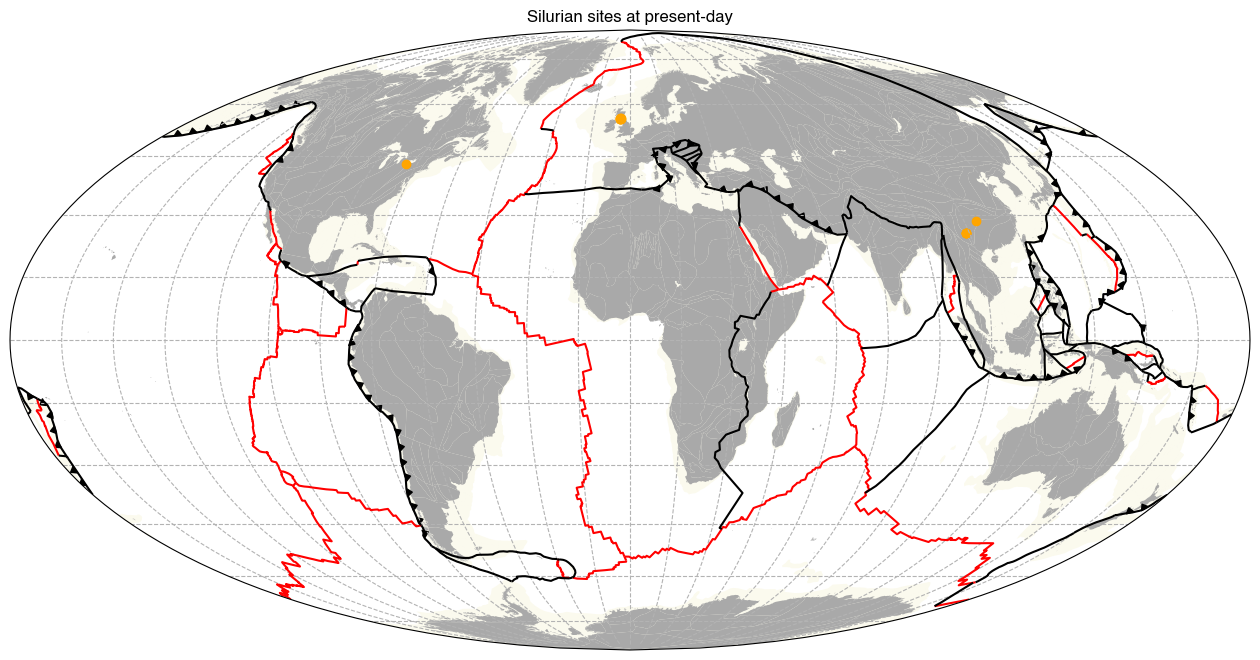

In [6]:
#present-day plot
# Set up a GeoAxis plot
fig = plt.figure(figsize=(16, 12), dpi=100)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude=0))
ax.set_global()
ax.gridlines(color='0.7', linestyle='--', xlocs=np.arange(-180,
             180, 15), ylocs=np.arange(-90, 90, 15))

## comment/uncomment as necessary
ax.set_title("Silurian sites at present-day")
#ax.set_title("Lochkovian sites at present-day")
#ax.set_title("Emsian sites at present-day")
#ax.set_title("Eifelian sites at present-day")
#ax.set_title("Givetian sites at present-day")
#ax.set_title("Frasnian sites at present-day")
#ax.set_title("Famennian sites at present-day")

# Plot shapefile features, subduction zones and MOR boundaries at 0 Ma
period_time = 0

gplot.time = period_time
gplot.plot_continents(ax, facecolor='palegoldenrod', alpha=0.2)
gplot.plot_coastlines(ax, color='DarkGrey')
gplot.plot_ridges_and_transforms(ax, color='red')
gplot.plot_misc_boundaries(ax, color='k')
gplot.plot_trenches(ax, color='k')
gplot.plot_subduction_teeth(ax, color='k')

## comment/uncomment as necessary
sc = ax.scatter(SILsite_locs['lon'], SILsite_locs['lat'], color='orange',
#sc = ax.scatter(LOCHsite_locs['lon'], LOCHsite_locs['lat'], color='orange',
#sc = ax.scatter(EMSsite_locs['lon'], EMSsite_locs['lat'], color='orange',
#sc = ax.scatter(EIFsite_locs['lon'], EIFsite_locs['lat'], color='orange',
#sc = ax.scatter(GIVsite_locs['lon'], GIVsite_locs['lat'], color='orange',
#sc = ax.scatter(FRASsite_locs['lon'], FRASsite_locs['lat'], color='orange',
#sc = ax.scatter(FAMsite_locs['lon'], FAMsite_locs['lat'], color='orange',
                transform=ccrs.PlateCarree())

ax.legend(frameon=False)

In [7]:
import pandas as pd

## comment/uncomment as necessary

SILgpts = gplately.Points(model, SILsite_locs['lon'], SILsite_locs['lat'])
reconstruction_time = np.mean(0.5*(SILsite_locs['min_ma'] + SILsite_locs['max_ma']))
rlons, rlats = SILgpts.reconstruct(reconstruction_time, return_array=True)
rlats_arr = np.array(rlats)
rlons_arr = np.array(rlons)
coords_list = list(zip(rlats_arr, rlons_arr))
SILpalpts = pd.DataFrame(coords_list, columns=['lat','lon'])
print(SILpalpts)

#LOCHgpts = gplately.Points(model, LOCHsite_locs['lon'], LOCHsite_locs['lat'])
#reconstruction_time = np.mean(0.5*(LOCHsite_locs['min_ma'] + LOCHsite_locs['max_ma']))
#rlons, rlats = LOCHgpts.reconstruct(reconstruction_time, return_array=True)
#rlats_arr = np.array(rlats)
#rlons_arr = np.array(rlons)
#coords_list = list(zip(rlats_arr, rlons_arr))
#LOCHpalpts = pd.DataFrame(coords_list, columns=['lat','lon'])
#print(LOCHpalpts)

#EMSgpts = gplately.Points(model, EMSsite_locs['lon'], EMSsite_locs['lat'])
#reconstruction_time = np.mean(0.5*(EMSsite_locs['min_ma'] + EMSsite_locs['max_ma']))
#rlons, rlats = EMSgpts.reconstruct(reconstruction_time, return_array=True)
#rlats_arr = np.array(rlats)
#rlons_arr = np.array(rlons)
#coords_list = list(zip(rlats_arr, rlons_arr))
#EMSpalpts = pd.DataFrame(coords_list, columns=['lat','lon'])
#print(EMSpalpts)

#EIFgpts = gplately.Points(model, EIFsite_locs['lon'], EIFsite_locs['lat'])
#reconstruction_time = np.mean(0.5*(EIFsite_locs['min_ma'] + EIFsite_locs['max_ma']))
#rlons, rlats = EIFgpts.reconstruct(reconstruction_time, return_array=True)
#rlats_arr = np.array(rlats)
#rlons_arr = np.array(rlons)
#coords_list = list(zip(rlats_arr, rlons_arr))
#EIFpalpts = pd.DataFrame(coords_list, columns=['lat','lon'])
#print(EIFpalpts)

#GIVgpts = gplately.Points(model, GIVsite_locs['lon'], GIVsite_locs['lat'])
#reconstruction_time = np.mean(0.5*(GIVsite_locs['min_ma'] + GIVsite_locs['max_ma']))
#rlons, rlats = GIVgpts.reconstruct(reconstruction_time, return_array=True)
#rlats_arr = np.array(rlats)
#rlons_arr = np.array(rlons)
#coords_list = list(zip(rlats_arr, rlons_arr))
#GIVpalpts = pd.DataFrame(coords_list, columns=['lat','lon'])
#print(GIVpalpts)

#FRASgpts = gplately.Points(model, FRASsite_locs['lon'], FRASsite_locs['lat'])
#reconstruction_time = np.mean(0.5*(FRASsite_locs['min_ma'] + FRASsite_locs['max_ma']))
#rlons, rlats = FRASgpts.reconstruct(reconstruction_time, return_array=True)
#rlats_arr = np.array(rlats)
#rlons_arr = np.array(rlons)
#coords_list = list(zip(rlats_arr, rlons_arr))
#FRASpalpts = pd.DataFrame(coords_list, columns=['lat','lon'])
#print(FRASpalpts)

#FAMgpts = gplately.Points(model, FAMsite_locs['lon'], FAMsite_locs['lat'])
#reconstruction_time = np.mean(0.5*(FAMsite_locs['min_ma'] + FAMsite_locs['max_ma']))
#rlons, rlats = FAMgpts.reconstruct(reconstruction_time, return_array=True)
#rlats_arr = np.array(rlats)
#rlons_arr = np.array(rlons)
#coords_list = list(zip(rlats_arr, rlons_arr))
#FAMpalpts = pd.DataFrame(coords_list, columns=['lat','lon'])
#print(FAMpalpts)


          lat         lon
0  -19.071875 -101.004015
1   -1.375907   84.248993
2    3.924962   82.922218
3   -1.412633   84.271058
4   -1.375907   84.248993
5   -1.375907   84.248993
6  -16.605808  -70.889780
7  -16.603202  -70.967075
8  -16.520561  -70.891342
9  -16.633393  -70.898010
10 -16.549694  -70.936703
11 -16.620223  -70.991642


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


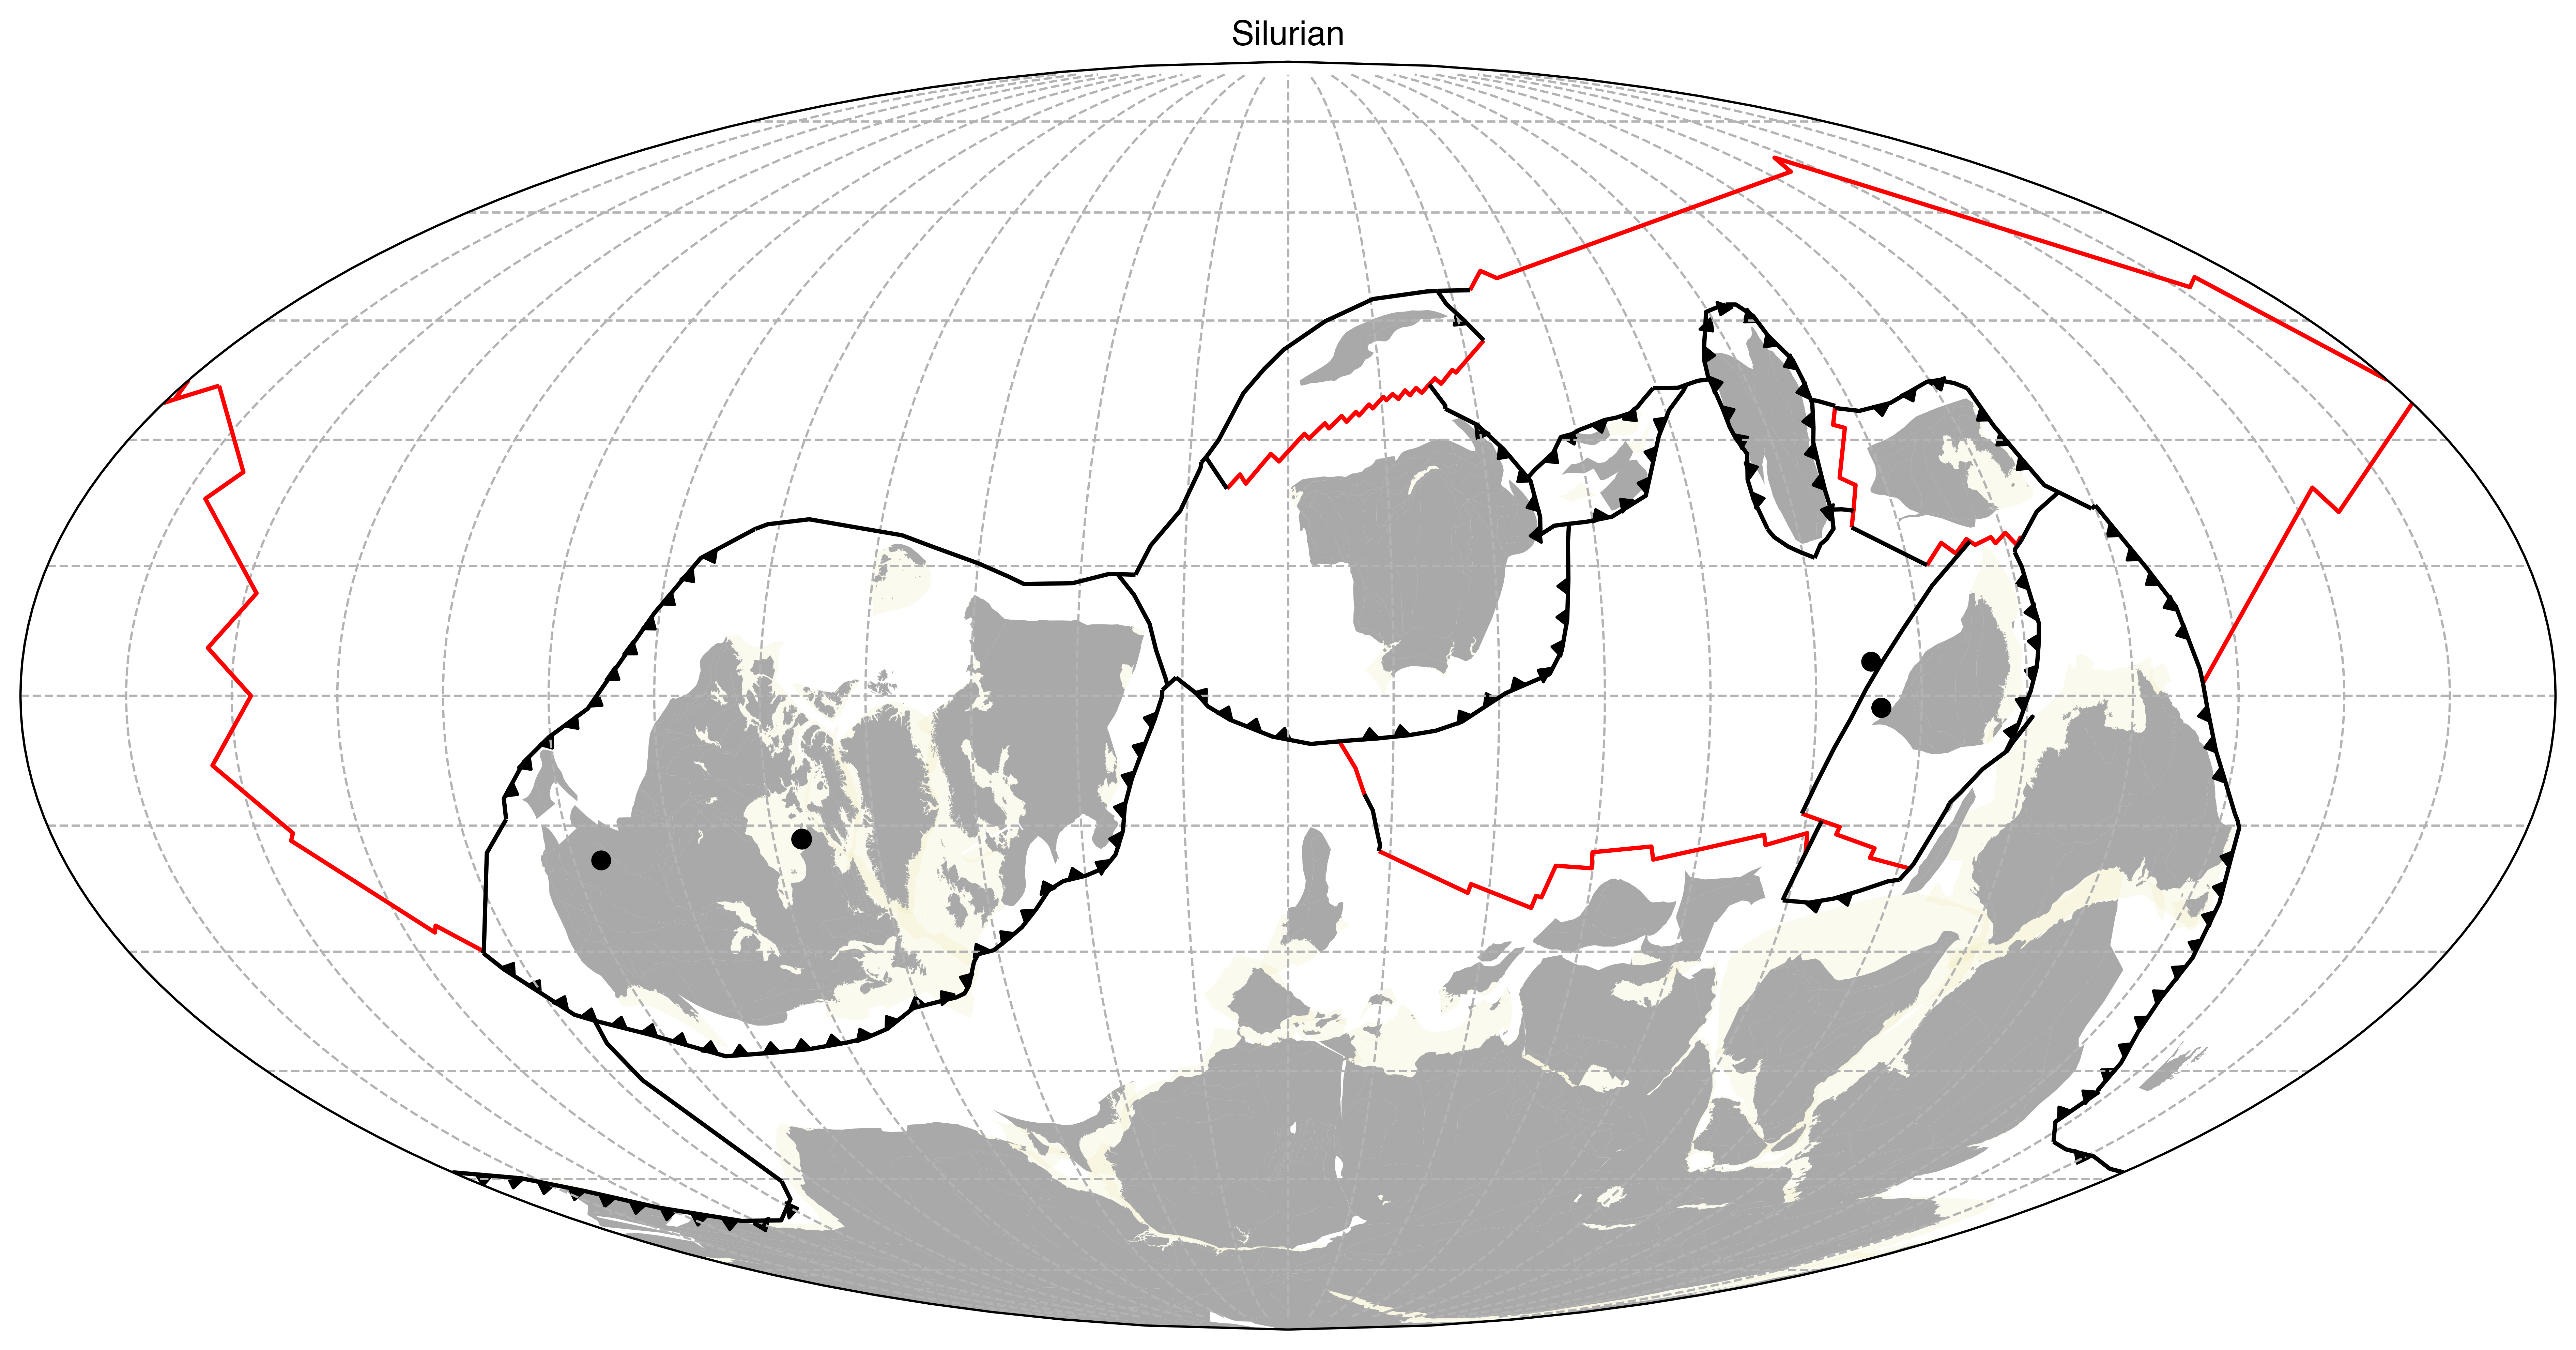

In [8]:
# set up a GeoAxis plot
fig = plt.figure(figsize=(16, 12), dpi=600)
ax = fig.add_subplot(111, projection=ccrs.Mollweide(central_longitude=0))
ax.set_global()
ax.gridlines(color='0.7', linestyle='--', xlocs=np.arange(-180,
             180, 15), ylocs=np.arange(-90, 90, 15))

## comment/uncomment as necessary
ax.set_title("Silurian")
#ax.set_title("Lochkovian")
#ax.set_title("Emsian")
#ax.set_title("Eifelian")
#ax.set_title("Givetian")
#ax.set_title("Frasnian")
#ax.set_title("Famennian")

## comment/uncomment as necessary
period_time = 428   # Silurian
# period_time = 415   # Lochkovian
# period_time = 400   # Emsian
# period_time = 391   # Eifelian
# period_time = 385   # Givetian
# period_time = 377   # Frasnian
# period_time = 366   # Famennian

# Plot shapefile features, subduction zones and MOR boundaries at 0 Ma
gplot.time = period_time  # Ma
gplot.plot_continents(ax, facecolor='palegoldenrod', alpha=0.2)
gplot.plot_coastlines(ax, color='DarkGrey')
gplot.plot_ridges_and_transforms(ax, color='red')
gplot.plot_misc_boundaries(ax, color='k')
gplot.plot_trenches(ax, color='k')
gplot.plot_subduction_teeth(ax, color='k')

sc = ax.scatter(rlons, rlats, color='black',
                transform=ccrs.PlateCarree())
ax.legend(frameon=False)

In [15]:
#export to shapefile
outfile = f'polygons_{np.round(period_time)}_Ma.shp'
pygplates.reconstruct(
    coastlines[0], model.rotation_model, outfile, period_time)

In [17]:
# save reconstructed point data to csv/gpml (gplates compatible))

## comment/uncomment as necessary
SILpalpts.insert(2, 'ID', SILsite_locs['ID'], True)
SILpalpts.insert(2, 'FROMAGE', SILsite_locs['max_ma'], True)
SILpalpts.insert(2, 'TOAGE', SILsite_locs['min_ma'], True)
print(SILpalpts)
SILpalpts.to_csv('SIL_pdata.csv', index=False)

#LOCHpalpts.insert(2, 'ID', LOCHsite_locs['ID'], True)
#LOCHpalpts.insert(2, 'FROMAGE', LOCHsite_locs['max_ma'], True)
#LOCHpalpts.insert(2, 'TOAGE', LOCHsite_locs['min_ma'], True)
#print(LOCHpalpts)
#LOCHpalpts.to_csv('LOCH_pdata.csv', index=False)

#EMSpalpts.insert(2, 'ID', EMSsite_locs['ID'], True)
#EMSpalpts.insert(2, 'FROMAGE', EMSsite_locs['max_ma'], True)
#EMSpalpts.insert(2, 'TOAGE', EMSsite_locs['min_ma'], True)
#print(EMSpalpts)
#EMSpalpts.to_csv('EMS_pdata.csv', index=False)

#EIFpalpts.insert(2, 'ID', EIFsite_locs['ID'], True)
#EIFpalpts.insert(2, 'FROMAGE', EIFsite_locs['max_ma'], True)
#EIFpalpts.insert(2, 'TOAGE', EIFsite_locs['min_ma'], True)
#print(EIFpalpts)
#EIFpalpts.to_csv('EIF_pdata.csv', index=False)

#GIVpalpts.insert(2, 'ID', GIVsite_locs['ID'], True)
#GIVpalpts.insert(2, 'FROMAGE', GIVsite_locs['max_ma'], True)
#GIVpalpts.insert(2, 'TOAGE', GIVsite_locs['min_ma'], True)
#print(GIVpalpts)
#GIVpalpts.to_csv('GIV_pdata.csv', index=False)

#FRASpalpts.insert(2, 'ID', FRASsite_locs['ID'], True)
#FRASpalpts.insert(2, 'FROMAGE', FRASsite_locs['max_ma'], True)
#FRASpalpts.insert(2, 'TOAGE', FRASsite_locs['min_ma'], True)
#print(FRASpalpts)
#FRASpalpts.to_csv('FRAS_pdata.csv', index=False)

#FAMpalpts.insert(2, 'ID', FAMsite_locs['ID'], True)
#FAMpalpts.insert(2, 'FROMAGE', FAMsite_locs['max_ma'], True)
#FAMpalpts.insert(2, 'TOAGE', FAMsite_locs['min_ma'], True)
#print(FAMpalpts)
#FAMpalpts.to_csv('FAM_pdata.csv', index=False)

      

          lat         lon       TOAGE  FROMAGE   ID
0  -19.071875 -101.004015  420.466667    419.2   36
1   -1.375907   84.248993  425.600000    419.2   52
2    3.924962   82.922218  436.800000    433.4   53
3   -1.412633   84.271058  427.400000    423.0   54
4   -1.375907   84.248993  427.400000    423.0   55
5   -1.375907   84.248993  423.000000    419.2   56
6  -16.605808  -70.889780  433.400000    431.4  117
7  -16.603202  -70.967075  433.400000    431.4  118
8  -16.520561  -70.891342  436.866667    433.4  130
9  -16.633393  -70.898010  436.866667    433.4  131
10 -16.549694  -70.936703  436.866667    433.4  132
11 -16.620223  -70.991642  423.000000    419.2  133
